In [41]:
import numpy as np
from sklearn import metrics
# silhouette score
hic=np.loadtxt("../GM12878/chr19_50kb/chr19_50000.hic")
n = len(hic)
labels = np.zeros(n)
for i in range(n):
    labels[i] = -1
file = "../GM12878/chr19_50kb/TAD/DBSCAN.txt"
hic_sample = []
labels = []
with open(file) as tad:
    for num, line in enumerate(tad):
        line = line.split()
        start = int(line[0])
        end = int(line[2])
        for i in range (start, end + 1):
            hic_sample.append(hic[i])
            labels.append(num)
    tad.close()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(hic_sample, labels))

Silhouette Coefficient: 0.092


In [70]:
import numpy as np
# TAD quality
hic=np.loadtxt("../chr19_50kb/chr19_50000.hic")
n = len(hic)
file = "../chr19_50kb/TAD/DBSCAN.txt"
tad = np.loadtxt(file)
intra = 0
intra_num = 0
for n in range(len(tad)):
    for i in range(int(tad[n,0]),int(tad[n,2]+1)):
        for j in range(int(tad[n,0]),int(tad[n,2]+1)):
            intra = intra + hic[i,j]
            intra_num = intra_num + 1
intra = intra / intra_num
print("intra TAD: %0.3f" % intra)
inter = 0
inter_num = 0
for n in range(len(tad) - 1):
    for i in range(int(tad[n,0]),int(tad[n,2]+1)):
        for j in range(int(tad[n+1,0]),int(tad[n+1,2]+1)):
            inter = inter + hic[i,j]
            inter_num = inter_num + 1
inter = inter / inter_num
print("inter TAD: %0.3f" % inter)
print("quality: %0.3f" % (intra - inter))

intra TAD: 2124.728
inter TAD: 234.671
quality: 1890.057


In [71]:
import numpy as np
#Ave. Size of TADs
file = "../chr19_50kb/TAD/DBSCAN.txt"
tad = np.loadtxt(file)
n = len(tad)
size = 0
res = 50000
for i in range(n):
    start = tad[i,1]
    end = tad[i,3] + res
    size = size + (end - start)
size = size / n
print("Ave. Size of TADs: %0.3f" % size)

Ave. Size of TADs: 775555.556


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def calcuDist(arr, e):
    size = len(arr)
    idx = 0
    val = abs(e - arr[idx][0])
    
    for i in range(1, size):
        val1 = abs(e - arr[i][0])
        if val1 < val:
            idx = i
            val = val1
    if arr[idx][0] < e and arr[idx][1] < e:
        return e - arr[idx][1]
    elif arr[idx][0] < e and arr[idx][1] > e:
        return 0
    else:
        return e - arr[idx][0]
    
    
filename = "../smc3.bed"
ctcf=[]
with open(filename, 'r') as file_to_read:
    for i, line in enumerate(file_to_read):
        line = line.strip().split()
        if line[0] == "chr19":
            ctcf.append([int(line[1]), int(line[2])])
    file_to_read.close()

tad = "../chr19_5kb/TAD/DBSCAN_5kb.txt"
# tad = "DBSCAN_5kb.txt"
distances = []
with open(tad) as tad:
    for num, line in enumerate(tad):
        line = line.split()
        start = int(line[1])
        end = int(line[2])
        dist_start = calcuDist(ctcf, start)
        dist_end = calcuDist(ctcf, end)
        if abs(dist_start) <= abs(dist_end):
            distances.append(dist_start)
        else:
            distances.append(dist_end)
    tad.close()

plt.figure(figsize=(8,4),dpi=100)
kde = sns.histplot(distances, kde=True)
kde.set_title('smc3')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../chr19_5kb/TAD/DBSCAN_5kb.txt'

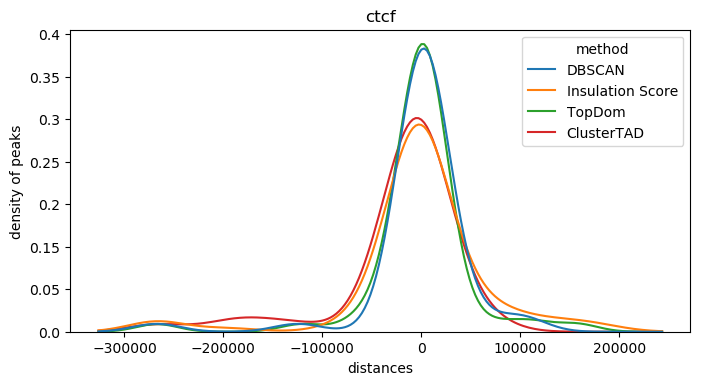

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def calcuDist(arr, e):
    size = len(arr)
    idx = 0
    val = abs(e - arr[idx][0])
    
    for i in range(1, size):
        val1 = abs(e - arr[i][0])
        if val1 < val:
            idx = i
            val = val1
    if arr[idx][0] < e and arr[idx][1] < e:
        return e - arr[idx][1]
    elif arr[idx][0] < e and arr[idx][1] > e:
        return 0
    else:
        return e - arr[idx][0]
    
   

file = "ctcf"
filename = "../{}.bed".format(file)
ctcf=[]
with open(filename, 'r') as file_to_read:
    for i, line in enumerate(file_to_read):
        line = line.strip().split()
        if line[0] == "chr19":
            ctcf.append([int(line[1]), int(line[2])])
    file_to_read.close()


def getlist(name):
    tad = "../GM12878/chr19_50kb/TAD/{}.txt".format(name)
    distances = []
    with open(tad) as tad:
        for num, line in enumerate(tad):
            line = line.split()
            start = int(line[1])
            end = int(line[2])
            dist_start = calcuDist(ctcf, start)
            dist_end = calcuDist(ctcf, end)
            if abs(dist_start) <= abs(dist_end):
                distances.append(dist_start)
            else:
                distances.append(dist_end)
        tad.close()
    return list(set(distances))

DBSCAN = getlist("DBSCAN")
IS = getlist("IS")
TopDom = getlist("TopDom")
TADtree = getlist("TADtree")
clusterTAD = getlist("clusterTAD")

    
DB = {'method': 'DBSCAN', 'distances': DBSCAN}
IS = {'method': 'Insulation Score', 'distances': IS}
TO = {'method': 'TopDom', 'distances': TopDom}
TA = {'method': 'TADtree', 'distances': TADtree}
CL = {'method': 'ClusterTAD', 'distances': clusterTAD}

DBF = pd.DataFrame(data=DB)
ISF = pd.DataFrame(data=IS)
TOF = pd.DataFrame(data=TO)
TAF = pd.DataFrame(data=TA)
CLF = pd.DataFrame(data=CL)

dataf = DBF.append([ISF,TOF,CLF], ignore_index=True)



plt.figure(figsize=(8,4),dpi=100)
line = sns.kdeplot(data=dataf, x="distances", hue="method", common_norm = False, common_grid=True,)
line.set(title=file, ylabel="density of peaks" , yticklabels=[0.00,0.05,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50])
plt.show()